In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axes as ax
LoL_df = pd.read_excel("2019-summer-match-data-OraclesElixir-2019-08-05.xlsx")
C9_df = LoL_df[LoL_df['team'] == 'Cloud9']
print(C9_df.columns)

Index(['gameid', 'url', 'league', 'split', 'date', 'week', 'game', 'patchno',
       'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'k', 'd', 'a',
       'teamkills', 'teamdeaths', 'doubles', 'triples', 'quadras', 'pentas',
       'fb', 'fbassist', 'fbvictim', 'fbtime', 'kpm', 'okpm', 'ckpm', 'fd',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elementals',
       'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'dmgshare',
       'earnedgoldshare', 'wards', 'wpm', 'wardshare', 'wardkills', 'wcpm',
       'visionwards', 'visionwardbuys', 'visiblewardclearrate',
       'invisiblewardclearrate', 'totalgold', 'earnedg

In [2]:
Licorice_df = C9_df[C9_df['player'] == 'Licorice']
Kumo_df = C9_df[C9_df['player'] == 'Kumo']
Svenskeren_df = C9_df[C9_df['player'] == 'Svenskeren']
Blaber_df = C9_df[C9_df['player'] == 'Blaber']
Nisqy_df = C9_df[C9_df['player'] == 'Nisqy']
Sneaky_df = C9_df[C9_df['player'] == 'Sneaky']
Deftly_df = C9_df[C9_df['player'] == 'Deftly']
Zeyzal_df = C9_df[C9_df['player'] == 'Zeyzal']
Team_df = C9_df[C9_df['player'] == 'Team']
C9 = {'Licorice': Licorice_df, 'Kumo': Kumo_df, 'Svenskeren': Svenskeren_df, 'Blaber': Blaber_df, 
      'Nisqy': Nisqy_df, 'Sneaky': Sneaky_df, 'Deftly': Deftly_df, 'Zeyzal': Zeyzal_df, 'Team': Team_df}

Win rate by patch: 
{'9.10': 1.0, '9.11': 0.5, '9.12': 0.75, '9.13': 0.5, '9.14': 0.8}
Running win rate: 
[0.0, 1.0, 0.75, 0.6666666666666666, 0.625, 0.7, 0.6666666666666666, 0.6428571428571429, 0.625, 0.6666666666666666, 0.6842105263157895]
First blood percentage: 0.631578947368421
Win rate given first blood: 
0.5833333333333334
Win rate given first blood victim: 
0.8571428571428571
First turret percentage: 0.42105263157894735
First turret given herald: 
0.5833333333333334
First turret not given herald: 
0.14285714285714285
Win rate given first turret: 
0.75
Win rate not given first turret: 
0.6363636363636364
First to three turrets percentage: 0.5263157894736842
First to three towers given herald: 
0.6666666666666666
First to three towers not given herald: 
0.2857142857142857
Win rate given first to three turrets: 
0.9
Win rate not given first to three turrets: 
0.4444444444444444
First dragon percentage: 0.42105263157894735
Win rate given first dragon: 
0.75
Win rate not given first

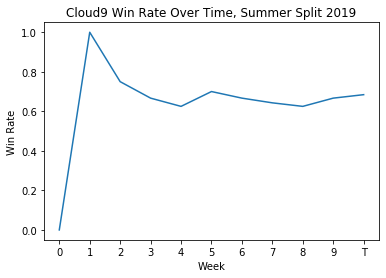

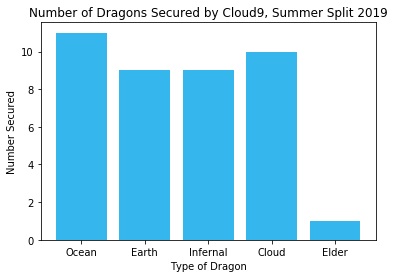

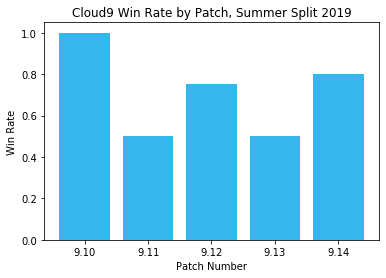

In [46]:
#Team Stats

WROT_df = C9['Team'][['week', 'patchno', 'result']]
#print(WROT_df)

win_rate_by_patch = {}
for i in WROT_df['patchno'].unique():
    win_rate_by_patch['%.2f'%i] = np.sum(WROT_df[WROT_df['patchno'] == i]['result'])/len(WROT_df[WROT_df['patchno'] == i])
print("Win rate by patch: ")
print(win_rate_by_patch)

running_win_number = [0]
for i in WROT_df['week'].unique():
    running_win_number.append(running_win_number[-1] + np.sum(WROT_df[WROT_df['week'] == i]['result']))
running_win_rate = []
games_played = [1,2,4,6,8,10,12,14,16,18,19]
for i in range(len(running_win_number)):
    running_win_rate.append(running_win_number[i]/games_played[i])
print("Running win rate: ")
print(running_win_rate)

fb_pct = len(C9['Team'][C9['Team']['fb'] == 1])/len(C9['Team'])
print("First blood percentage: " + str(fb_pct))

WR_given_first_blood = np.sum(C9['Team'][C9['Team']['fb'] == 1]['result']) / len(C9['Team'][C9['Team']['fb'] == 1])
print("Win rate given first blood: ")
print(WR_given_first_blood)

WR_given_first_blood_victim = np.sum(C9['Team'][C9['Team']['fb'] == 0]['result']) / len(C9['Team'][C9['Team']['fb'] == 0])
print("Win rate given first blood victim: ")
print(WR_given_first_blood_victim)

ft_pct = len(C9['Team'][C9['Team']['ft'] == 1])/len(C9['Team'])
print("First turret percentage: " + str(ft_pct))

ft_given_herald = np.sum(C9['Team'][C9['Team']['herald'] == 1]['ft'])/len(C9['Team'][C9['Team']['herald'] == 1])
print('First turret given herald: ')
print(ft_given_herald)

ft_not_given_herald = np.sum(C9['Team'][C9['Team']['herald'] == 0]['ft'])/len(C9['Team'][C9['Team']['herald'] == 0])
print('First turret not given herald: ')
print(ft_not_given_herald)

WR_given_first_turret = np.sum(C9['Team'][C9['Team']['ft'] == 1]['result'])/len(C9['Team'][C9['Team']['ft'] == 1])
print("Win rate given first turret: ")
print(WR_given_first_turret)

WR_not_given_first_turret = np.sum(C9['Team'][C9['Team']['ft'] == 0]['result'])/len(C9['Team'][C9['Team']['ft'] == 0])
print("Win rate not given first turret: ")
print(WR_not_given_first_turret)

fto3_pct = len(C9['Team'][C9['Team']['firsttothreetowers'] == 1])/len(C9['Team'])
print("First to three turrets percentage: " + str(fto3_pct))

fto3_given_herald = np.sum(C9['Team'][C9['Team']['herald'] == 1]['firsttothreetowers'])/len(C9['Team'][C9['Team']['herald'] == 1])
print('First to three towers given herald: ')
print(fto3_given_herald)

fto3_not_given_herald = np.sum(C9['Team'][C9['Team']['herald'] == 0]['firsttothreetowers'])/len(C9['Team'][C9['Team']['herald'] == 0])
print('First to three towers not given herald: ')
print(fto3_not_given_herald)

WR_given_fto3 = np.sum(C9['Team'][C9['Team']['firsttothreetowers'] == 1]['result'])/len(C9['Team'][C9['Team']['firsttothreetowers'] == 1])
print("Win rate given first to three turrets: ")
print(WR_given_fto3)

WR_not_given_fto3 = np.sum(C9['Team'][C9['Team']['firsttothreetowers'] == 0]['result'])/len(C9['Team'][C9['Team']['firsttothreetowers'] == 0])
print("Win rate not given first to three turrets: ")
print(WR_not_given_fto3)

fd_pct = len(C9['Team'][C9['Team']['fd'] == 1])/len(C9['Team'])
print("First dragon percentage: " + str(fd_pct))

WR_given_first_dragon = np.sum(C9['Team'][C9['Team']['fd'] == 1]['result']) / len(C9['Team'][C9['Team']['fd'] == 1])
print("Win rate given first dragon: ")
print(WR_given_first_dragon)

WR_not_given_first_dragon = np.sum(C9['Team'][C9['Team']['fd'] == 0]['result']) / len(C9['Team'][C9['Team']['fd'] == 0])
print("Win rate not given first dragon: ")
print(WR_not_given_first_dragon)

dragons = []
dragons.append(np.sum(C9['Team']['waterdrakes']))
dragons.append(np.sum(C9['Team']['earthdrakes']))
dragons.append(np.sum(C9['Team']['firedrakes']))
dragons.append(np.sum(C9['Team']['airdrakes']))
dragons.append(np.sum(C9['Team']['elders']))
print(dragons)

fd_given_fb = np.sum(C9['Team'][C9['Team']['fb'] == 0]['fd']) / len(C9['Team'][C9['Team']['fb'] == 1])
print("First dragon given first blood: ")
print(fd_given_fb)

ft_given_fb = np.sum(C9['Team'][C9['Team']['fb'] == 1]['ft']) / len(C9['Team'][C9['Team']['fb'] == 1])
print("First tower given first blood: ")
print(ft_given_fb)

ft_given_fd = np.sum(C9['Team'][C9['Team']['fd'] == 1]['ft']) / len(C9['Team'][C9['Team']['fd'] == 1])
print("First tower given first dragon: ")
print(ft_given_fd)

fto3_given_fb = np.sum(C9['Team'][C9['Team']['fb'] == 1]['firsttothreetowers']) / len(C9['Team'][C9['Team']['fb'] == 1])
print("First to three turrets given first blood: ")
print(fto3_given_fb)

herald_pct = len(C9['Team'][C9['Team']['herald'] == 1])/len(C9['Team'])
print("Herald percentage: " + str(herald_pct))

WR_given_herald = np.sum(C9['Team'][C9['Team']['herald'] == 1]['result']) / len(C9['Team'][C9['Team']['herald']==1])
print('Win rate given herald:')
print(WR_given_herald)

WR_given_fd = np.sum(C9['Team'][C9['Team']['fd'] == 1]['result']) / len(C9['Team'][C9['Team']['fd']==1])
print('Win rate given first dragon:')
print(WR_given_fd)

WR_not_given_herald = np.sum(C9['Team'][C9['Team']['herald'] == 0]['result']) / len(C9['Team'][C9['Team']['herald']==0])
print('Win rate not given herald:')
print(WR_not_given_herald)

fbaron_pct = len(C9['Team'][C9['Team']['fbaron'] == 1])/len(C9['Team'])
print("First baron percentage: " + str(fbaron_pct))

WR_given_first_baron = np.sum(C9['Team'][C9['Team']['fbaron'] == 1]['result']) / len(C9['Team'][C9['Team']['fbaron'] == 1])
print("Win rate given first baron: ")
print(WR_given_first_baron)

WR_not_given_first_baron = np.sum(C9['Team'][C9['Team']['fbaron'] == 0]['result']) / len(C9['Team'][C9['Team']['fbaron'] == 0])
print("Win rate not given first baron: ")
print(WR_not_given_first_baron)

plt.plot(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'T'], running_win_rate)
plt.xlabel('Week', size = 10)
plt.ylabel('Win Rate', size = 10)
plt.title('Cloud9 Win Rate Over Time, Summer Split 2019', size = 12)
plt.show()

plt.bar(['Ocean', 'Earth', 'Infernal', 'Cloud', 'Elder'], dragons, color = '#35b6ec')
plt.xlabel('Type of Dragon', size = 10)
plt.ylabel('Number Secured', size = 10)
plt.title('Number of Dragons Secured by Cloud9, Summer Split 2019', size = 12)
plt.show()

plt.bar(['9.10', '9.11', '9.12', '9.13', '9.14'], [1.0, 0.5, 0.75, 0.5, 0.8], color = '#35b6ec')
plt.xlabel('Patch Number', size = 10)
plt.ylabel('Win Rate', size = 10)
plt.title('Cloud9 Win Rate by Patch, Summer Split 2019', size = 12)
plt.show()


[331.0, 99.0, 488.0, 182.0, 407.0, 456.0, 47.0, 961.0]
[47.0, 99.0, 182.0, 331.0, 407.0, 456.0, 488.0, 961.0]
[4.266666666666667, 4.1, 4.542857142857143, 4.6, 5.764705882352941, 5.642857142857143, 6.0, 5.9411764705882355]
[4.1, 4.266666666666667, 4.542857142857143, 4.6, 5.642857142857143, 5.764705882352941, 5.9411764705882355, 6.0]


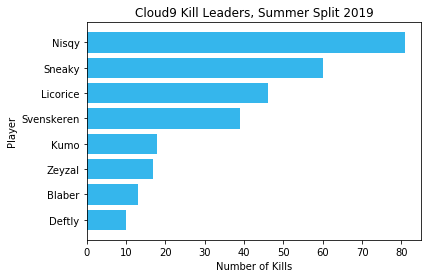

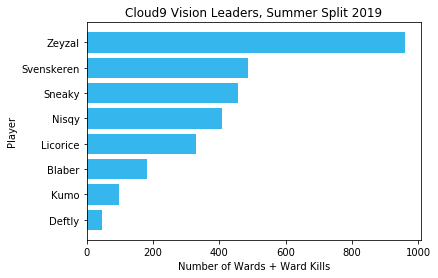

6.0


In [26]:
#Individual Stats

lico_k = np.sum(C9_df[C9_df['player'] == 'Licorice']['k'])
kumo_k = np.sum(C9_df[C9_df['player'] == 'Kumo']['k'])
sven_k = np.sum(C9_df[C9_df['player'] == 'Svenskeren']['k'])
blaber_k = np.sum(C9_df[C9_df['player'] == 'Blaber']['k'])
nisqy_k = np.sum(C9_df[C9_df['player'] == 'Nisqy']['k'])
sneaky_k = np.sum(C9_df[C9_df['player'] == 'Sneaky']['k'])
deftly_k = np.sum(C9_df[C9_df['player'] == 'Deftly']['k'])
zeyzal_k = np.sum(C9_df[C9_df['player'] == 'Zeyzal']['k'])
team_k = np.sum(C9_df[C9_df['player'] == 'Team']['k'])

lico_d = np.sum(C9_df[C9_df['player'] == 'Licorice']['d'])
kumo_d = np.sum(C9_df[C9_df['player'] == 'Kumo']['d'])
sven_d = np.sum(C9_df[C9_df['player'] == 'Svenskeren']['d'])
blaber_d = np.sum(C9_df[C9_df['player'] == 'Blaber']['d'])
nisqy_d = np.sum(C9_df[C9_df['player'] == 'Nisqy']['d'])
sneaky_d = np.sum(C9_df[C9_df['player'] == 'Sneaky']['d'])
deftly_d = np.sum(C9_df[C9_df['player'] == 'Deftly']['d'])
zeyzal_d = np.sum(C9_df[C9_df['player'] == 'Zeyzal']['d'])
team_d = np.sum(C9_df[C9_df['player'] == 'Team']['d'])

lico_a = np.sum(C9_df[C9_df['player'] == 'Licorice']['a'])
kumo_a = np.sum(C9_df[C9_df['player'] == 'Kumo']['a'])
sven_a = np.sum(C9_df[C9_df['player'] == 'Svenskeren']['a'])
blaber_a = np.sum(C9_df[C9_df['player'] == 'Blaber']['a'])
nisqy_a = np.sum(C9_df[C9_df['player'] == 'Nisqy']['a'])
sneaky_a = np.sum(C9_df[C9_df['player'] == 'Sneaky']['a'])
deftly_a = np.sum(C9_df[C9_df['player'] == 'Deftly']['a'])
zeyzal_a = np.sum(C9_df[C9_df['player'] == 'Zeyzal']['a'])
team_a = np.sum(C9_df[C9_df['player'] == 'Team']['a'])

kills = [lico_k, kumo_k, sven_k, blaber_k, nisqy_k, sneaky_k, deftly_k, zeyzal_k]
deaths = [lico_d, kumo_d, sven_d, blaber_d, nisqy_d, sneaky_d, deftly_d, zeyzal_d]
assists = [lico_a, kumo_a, sven_a, blaber_a, nisqy_a, sneaky_a, deftly_a, zeyzal_a]

kda = []
for i in range(len(kills)):
    kda.append((kills[i] + assists[i])/deaths[i])

lico_v = np.sum(C9_df[C9_df['player'] == 'Licorice']['wards']) + np.sum(C9_df[C9_df['player'] == 'Licorice']['wardkills'])
kumo_v = np.sum(C9_df[C9_df['player'] == 'Kumo']['wards']) + np.sum(C9_df[C9_df['player'] == 'Kumo']['wardkills'])
sven_v = np.sum(C9_df[C9_df['player'] == 'Svenskeren']['wards']) + np.sum(C9_df[C9_df['player'] == 'Svenskeren']['wardkills'])
blaber_v = np.sum(C9_df[C9_df['player'] == 'Blaber']['wards']) + np.sum(C9_df[C9_df['player'] == 'Blaber']['wardkills'])
nisqy_v = np.sum(C9_df[C9_df['player'] == 'Nisqy']['wards']) + np.sum(C9_df[C9_df['player'] == 'Nisqy']['wardkills'])
sneaky_v = np.sum(C9_df[C9_df['player'] == 'Sneaky']['wards']) + np.sum(C9_df[C9_df['player'] == 'Sneaky']['wardkills'])
deftly_v = np.sum(C9_df[C9_df['player'] == 'Deftly']['wards']) + np.sum(C9_df[C9_df['player'] == 'Deftly']['wardkills'])
zeyzal_v = np.sum(C9_df[C9_df['player'] == 'Zeyzal']['wards']) + np.sum(C9_df[C9_df['player'] == 'Zeyzal']['wardkills'])
team_v = np.sum(C9_df[C9_df['player'] == 'Team']['wards']) + np.sum(C9_df[C9_df['player'] == 'Team']['wardkills'])
vision = [lico_v, kumo_v, sven_v, blaber_v, nisqy_v, sneaky_v, deftly_v, zeyzal_v]
print(vision)
vision.sort()
print(vision)
kills.sort()
print(kda)
kda.sort()
print(kda)
plt.barh(['Deftly', 'Blaber', 'Zeyzal', 'Kumo', 'Svenskeren', 'Licorice', 'Sneaky', 'Nisqy'], kills, color = '#35b6ec')
plt.xlabel('Number of Kills', size = 10)
plt.ylabel('Player', size = 10)
plt.title('Cloud9 Kill Leaders, Summer Split 2019', size = 12)
plt.show()

plt.barh(['Deftly', 'Kumo', 'Blaber', 'Licorice', 'Nisqy', 'Sneaky', 'Svenskeren', 'Zeyzal'], vision, color = '#35b6ec')
plt.xlabel('Number of Wards + Ward Kills', size = 10)
plt.ylabel('Player', size = 10)
plt.title('Cloud9 Vision Leaders, Summer Split 2019', size = 12)
plt.show()
